In [1]:
%run '/home/gvolta/XENON1T/Function/Useful/Def.ipynb'
%run '/home/gvolta/XENON1T/Function/Useful/S1PL_Def.ipynb'

Initialization done, Notebook was last run on: 03/12/2019
Initialization for S1PL, Notebook was last run on: 03/12/2019


In [2]:
import hax
hax.init(experiment='XENON1T',
         pax_version_policy = 'v6.10.1',
         )

import lax
from lax.lichens import postsr1

In [3]:
file_path = '/dali/lgrandi/giovo/pickle_haxcache/pax_v6.10.1/S1PL_data/selected/'
data = pd.read_pickle(file_path + 'bkg_cutted_SR1_S1PL.pkl')
data['CES'] = CES(data, 'cs2_bottom_nn_tf') #for alpha
data_1 = data[data['s1']<2e4] #for neutrinoless double beta decay analysis

In [4]:
popt_z_1 = [2.38811218e+02, 2.55991432e-05, 1.89468970e-01] 
popt_z_2 = [1.05256551e+02, 7.72450878e-02]

popt_S1_1 = [1.49406369e+01,  2.62994597e+01, -1.01825116e+00,  1.27941177e-02] 
popt_S2_2 = [2.18914476e+02, 1.19392164e+02, 5.32460349e-05]

In [5]:
x_bins_z = np.linspace(-83.45,-13.45,100)
y_h = []
y_l = []
for i in range(len(x_bins_z)):
    y_h.append(exp(x_bins_z[i], *popt_z_1))
    y_l.append(poly1(x_bins_z[i], *popt_z_2))

x_bins_S1 = np.linspace(0,2e5,5000)
y_S1 = []
for i in range(len(x_bins_S1)):
    y_S1.append((S1PatternLikelihoodProfile_1(x_bins_S1[i], *popt_S1_1))*(x_bins_S1[i]<600) + \
                 (S1arctan(x_bins_S1[i], *popt_S2_2))*(x_bins_S1[i]>=600))

In [6]:
CutS1PL_HE = postsr1.S1PatternLikelihood_HE()
data = CutS1PL_HE.process(data)
data_1 = CutS1PL_HE.process(data_1)

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Cut no di lax per dati sotto 2e4

In [7]:
CutS1PF_z_1 = (data_1['s1_pattern_fit_bottom_hax'] < exp(data_1['z_3d_nn_tf'], *popt_z_1))
CutS1PF_z_2 = (data_1['s1_pattern_fit_bottom_hax'] > poly1(data_1['z_3d_nn_tf'], *popt_z_2))
CutS1PL_1 = ((data_1['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_1(data_1['s1'], *popt_S1_1))&(data_1['s1']<600))
CutS1PL_2 = ((data_1['s1_pattern_fit_bottom_hax'] < S1arctan(data_1['s1'], *popt_S2_2))&(data_1['s1']>=600))
Cut = (CutS1PF_z_1&CutS1PF_z_2)|(CutS1PL_1|CutS1PL_2)
data_1['CutS1PL'] = Cut
data_1_cut = hax.cuts.selection(data_1, data_1['CutS1PL'] == True)
del CutS1PF_z_1, CutS1PF_z_2, CutS1PL_1, CutS1PL_2, Cut

/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Unnamed selection: 6518 rows removed (98.42% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [8]:
data_1_cut_lax = hax.cuts.selection(data_1, data_1['CutS1PatternLikelihood_HE'] == True)

Unnamed selection: 17364 rows removed (95.78% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


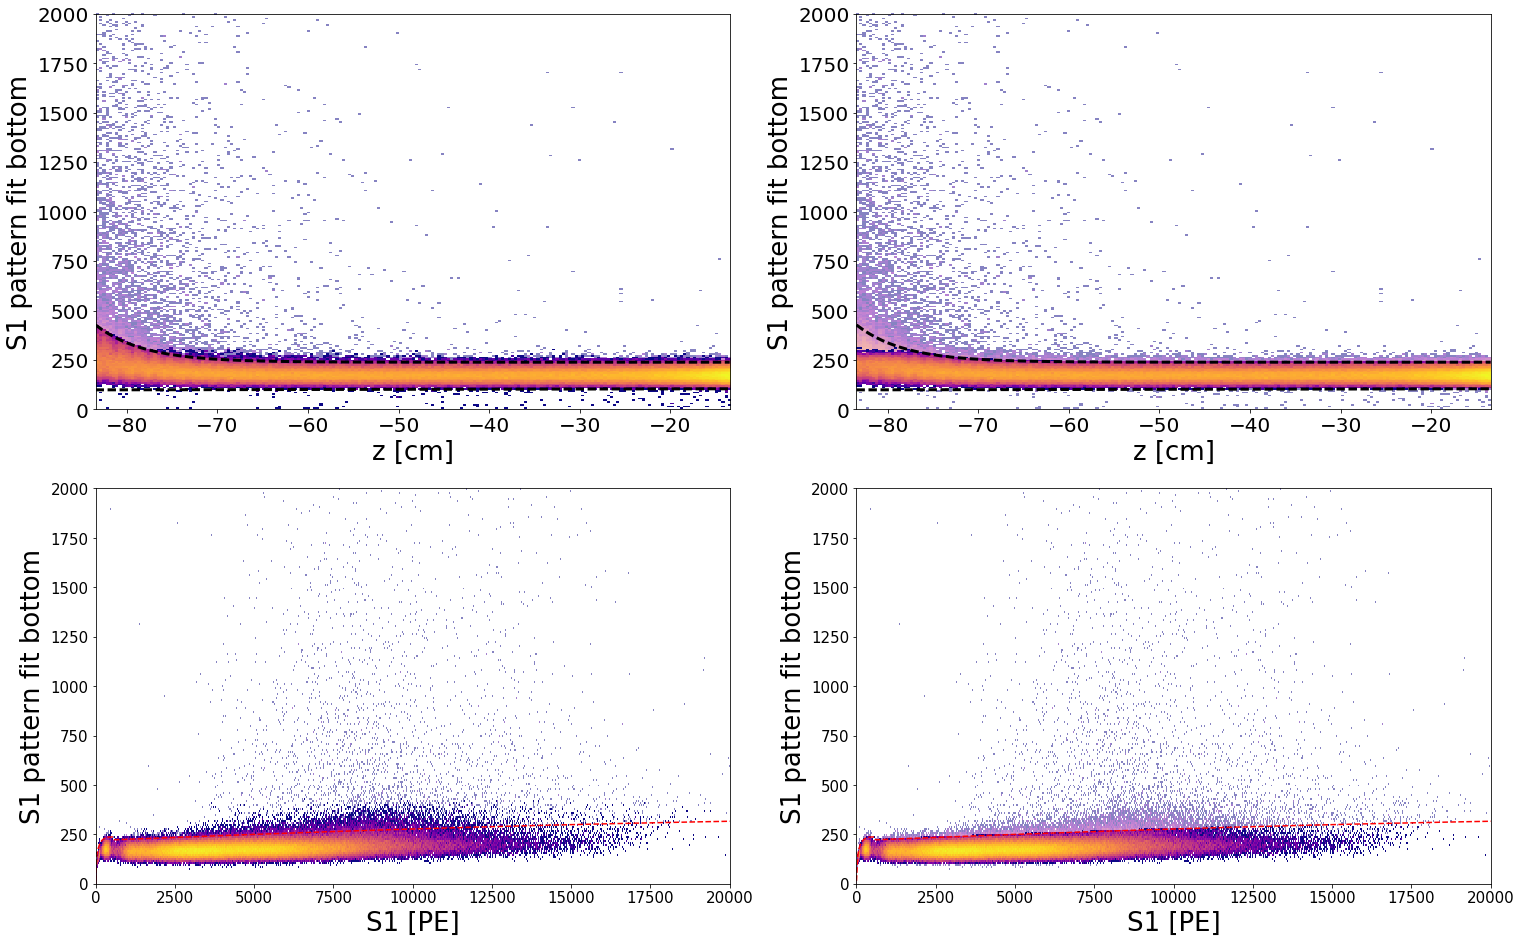

In [9]:
plt.figure(figsize=(25,16))

#################################################################################
plt.subplot(221)
xbins = np.linspace(-83.45, -13.45, 200)
ybins = np.linspace(0, 2000, 250)

plt.hist2d(data_1['z_3d_nn_tf'], data_1['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(data_1_cut['z_3d_nn_tf'], data_1_cut['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.plot(x_bins_z, y_h, 'k--', lw=3)
plt.plot(x_bins_z, y_l, 'k--', lw=3)
#################################################################################

#################################################################################
plt.subplot(222)
xbins = np.linspace(-83.45, -13.45, 200)
ybins = np.linspace(0, 2000, 250)

plt.hist2d(data_1['z_3d_nn_tf'], data_1['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(data_1_cut_lax['z_3d_nn_tf'], data_1_cut_lax['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.plot(x_bins_z, y_h, 'k--', lw=3)
plt.plot(x_bins_z, y_l, 'k--', lw=3)
#################################################################################

#################################################################################
plt.subplot(223)
xbins = np.linspace(0, 2e4, 1000)
ybins = np.linspace(0, 2e3, 200)
plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_1_cut['s1'], data_1_cut['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.plot(x_bins_S1, y_S1, 'r--')
#plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=15)
#################################################################################

#################################################################################
plt.subplot(224)
xbins = np.linspace(0, 2e4, 1000)
ybins = np.linspace(0, 2e3, 200)
plt.hist2d(data_1['s1'], data_1['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_1_cut_lax['s1'], data_1_cut_lax['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.plot(x_bins_S1, y_S1, 'r--')
#plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=15)
#################################################################################

plt.show()

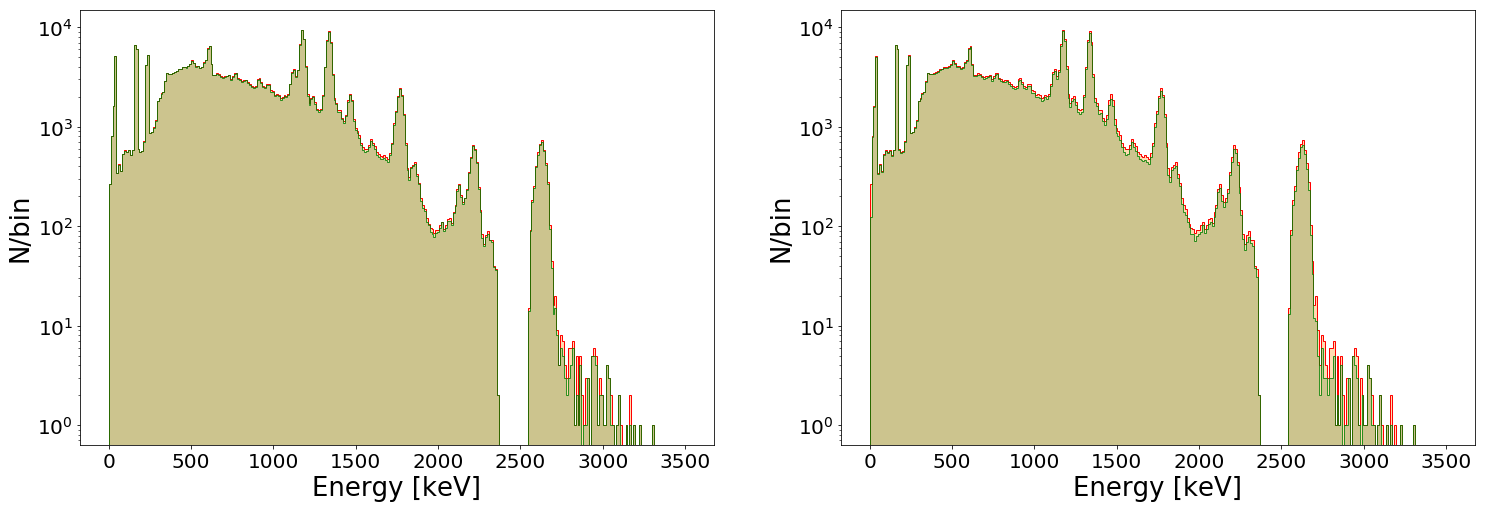

In [10]:
plt.figure(figsize=(25,8))

#################################################################################
plt.subplot(121)
plt.hist(data_1['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N/bin')
plt.yscale('log')
plt.tick_params(labelsize=20)

plt.hist(data_1_cut['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='bar', color='darkgreen',
         alpha = 0.2)
plt.hist(data_1_cut['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='step', color='green',
         alpha = 0.8)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')
plt.tick_params(labelsize=20)
#################################################################################

#################################################################################
plt.subplot(122)
plt.hist(data_1['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data_1['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N/bin')
plt.yscale('log')
plt.tick_params(labelsize=20)

plt.hist(data_1_cut_lax['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='bar', color='darkgreen',
         alpha = 0.2)
plt.hist(data_1_cut_lax['CES']/10**3, bins = (300), 
         range=(0, 3500), 
         histtype='step', color='green',
         alpha = 0.8)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')
plt.tick_params(labelsize=20)
#################################################################################

plt.show()

#### Cut no di lax per tutti gli eventi

In [11]:
CutS1PF_z_1 = (data['s1_pattern_fit_bottom_hax'] < exp(data['z_3d_nn_tf'], *popt_z_1))
CutS1PF_z_2 = (data['s1_pattern_fit_bottom_hax'] > poly1(data['z_3d_nn_tf'], *popt_z_2))
CutS1PL_1 = ((data['s1_pattern_fit_bottom_hax'] < S1PatternLikelihoodProfile_1(data['s1'], *popt_S1_1))&(data['s1']<600))
CutS1PL_2 = ((data['s1_pattern_fit_bottom_hax'] < S1arctan(data['s1'], *popt_S2_2))&(data['s1']>=600))
Cut = (CutS1PF_z_1&CutS1PF_z_2)|(CutS1PL_1|CutS1PL_2)
data['CutS1PL'] = Cut
data_cut = hax.cuts.selection(data, data['CutS1PL'] == True)
del CutS1PF_z_1, CutS1PF_z_2, CutS1PL_1, CutS1PL_2, Cut

Unnamed selection: 13976 rows removed (98.02% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


In [12]:
data_cut_lax = hax.cuts.selection(data, data['CutS1PatternLikelihood_HE'] == True)

Unnamed selection: 174280 rows removed (75.31% passed)


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


/cvmfs/xenon.opensciencegrid.org/releases/anaconda/2.4/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


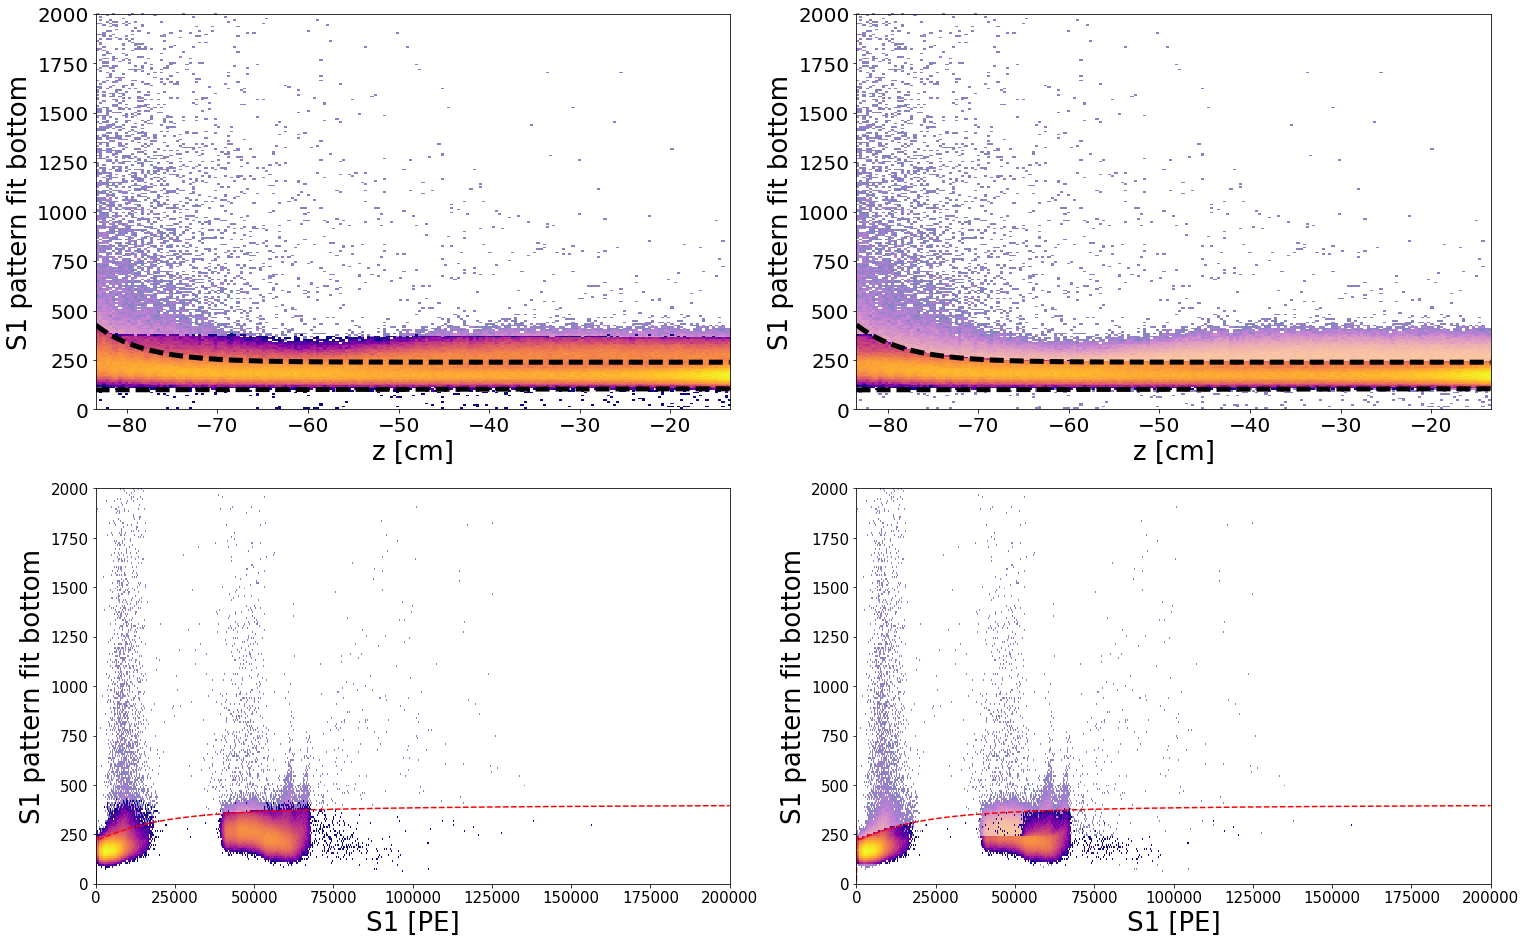

In [13]:
plt.figure(figsize=(25,16))

#################################################################################
plt.subplot(221)
xbins = np.linspace(-83.45, -13.45, 200)
ybins = np.linspace(0, 2000, 250)

plt.hist2d(data['z_3d_nn_tf'], data['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(data_cut['z_3d_nn_tf'], data_cut['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.plot(x_bins_z, y_h, 'k--', lw=5)
plt.plot(x_bins_z, y_l, 'k--', lw=5)
#################################################################################

#################################################################################
plt.subplot(222)
xbins = np.linspace(-83.45, -13.45, 200)
ybins = np.linspace(0, 2000, 250)

plt.hist2d(data['z_3d_nn_tf'], data['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 0.5)
plt.hist2d(data_cut_lax['z_3d_nn_tf'], data_cut_lax['s1_pattern_fit_bottom_hax'],
           bins=[xbins, ybins], 
           #range=((-83.45, -13.45), (0.0,5000)), 
           cmap=plt.cm.plasma, 
           norm=matplotlib.colors.LogNorm(),
           cmin = 1,alpha = 1)
plt.xlabel('z [cm]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=20)
plt.plot(x_bins_z, y_h, 'k--', lw=5)
plt.plot(x_bins_z, y_l, 'k--', lw=5)
#################################################################################

#################################################################################
plt.subplot(223)
xbins = np.linspace(0, 2e5, 1000)
ybins = np.linspace(0, 2e3, 200)
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_cut['s1'], data_cut['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.plot(x_bins_S1, y_S1, 'r--')
#plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=15)
#################################################################################

#################################################################################
plt.subplot(224)
xbins = np.linspace(0, 2e5, 1000)
ybins = np.linspace(0, 2e3, 200)
plt.hist2d(data['s1'], data['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 0.5)
plt.hist2d(data_cut_lax['s1'], data_cut_lax['s1_pattern_fit_bottom_hax'], bins=[xbins, ybins], 
           # bins=[xbins, ybins], range=((0,7e4), (0,1.5e3)), 
           cmap=plt.cm.plasma, norm=matplotlib.colors.LogNorm(), 
           cmin = 1,alpha = 1)
plt.plot(x_bins_S1, y_S1, 'r--')
#plt.colorbar(label='Number of events')
plt.xlabel('S1 [PE]', fontsize=26)
plt.ylabel('S1 pattern fit bottom', fontsize=26)
plt.tick_params(labelsize=15)
#################################################################################

plt.show()

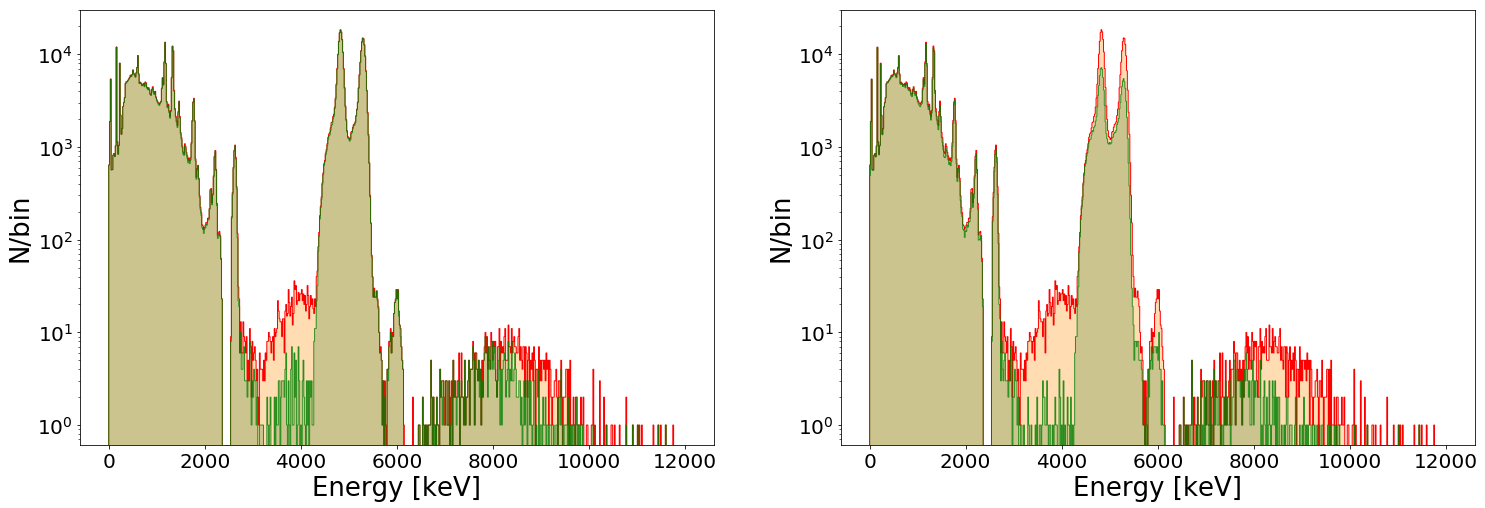

In [14]:
plt.figure(figsize=(25,8))

#################################################################################
plt.subplot(121)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N/bin')
plt.yscale('log')
plt.tick_params(labelsize=20)

plt.hist(data_cut['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='bar', color='darkgreen',
         alpha = 0.2)
plt.hist(data_cut['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='step', color='green',
         alpha = 0.8)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')
plt.tick_params(labelsize=20)
#################################################################################

#################################################################################
plt.subplot(122)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='bar', color='darkorange',
         alpha = 0.3)
plt.hist(data['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='step', color='red',
         alpha = 1)
plt.xlabel('Energy [keV]')
plt.ylabel('N/bin')
plt.yscale('log')
plt.tick_params(labelsize=20)

plt.hist(data_cut_lax['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='bar', color='darkgreen',
         alpha = 0.2)
plt.hist(data_cut_lax['CES']/10**3, bins = (700), 
         range=(0, 12000), 
         histtype='step', color='green',
         alpha = 0.8)
plt.xlabel('Energy [keV]', fontsize=26)
plt.ylabel('N/bin', fontsize=26)
plt.yscale('log')
plt.tick_params(labelsize=20)
#################################################################################

plt.show()